<a href="https://colab.research.google.com/github/KrishnaMoorthy47/Home-Loan-Approval-1/blob/main/HomeLoanApproval_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

!pip install --upgrade scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
df = pd.read_csv('/content/loan_sanction_train.csv')

test = pd.read_csv('/content/loan_sanction_test.csv')

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
df = df.drop('Loan_ID',axis =1)

In [8]:
df.Gender.value_counts()

Male      489
Female    112
Name: Gender, dtype: int64

In [9]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)

In [10]:
#df.Gender = df.Gender.fillna('Male')

In [11]:
#one_hot = pd.get_dummies(df['Gender'],prefix="Gender",drop_first=True)
#df = df.drop('Gender',axis = 1)
#df = df.join(one_hot)
#df.head()

In [12]:
#df.replace({'Yes':1,'No':0},inplace=True)
#df.head()

In [13]:
print(df.columns)

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [14]:
df.Married.value_counts()

Yes    398
No     213
Name: Married, dtype: int64

In [15]:
df.Married = df.Married.fillna('Yes')

In [16]:
df.Dependents.value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [17]:
df.Dependents = df.Dependents.fillna('0')

In [18]:
df.Self_Employed.value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [19]:
df.Self_Employed = df.Self_Employed.fillna('No')

In [20]:
df.LoanAmount = df.LoanAmount.fillna(df.LoanAmount.mean())

In [21]:
df['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [22]:
df.Loan_Amount_Term = df.Loan_Amount_Term.fillna(360.0)

In [23]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [24]:
df.Credit_History = df.Credit_History.fillna(1.0)

In [25]:
df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [26]:
len(df)

614

In [27]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y


In [28]:
#one_hot = pd.get_dummies(df['Gender'],prefix="Gender",drop_first=True)
#df = df.drop('Gender',axis = 1)
#df = df.join(one_hot)

#print(df.head())

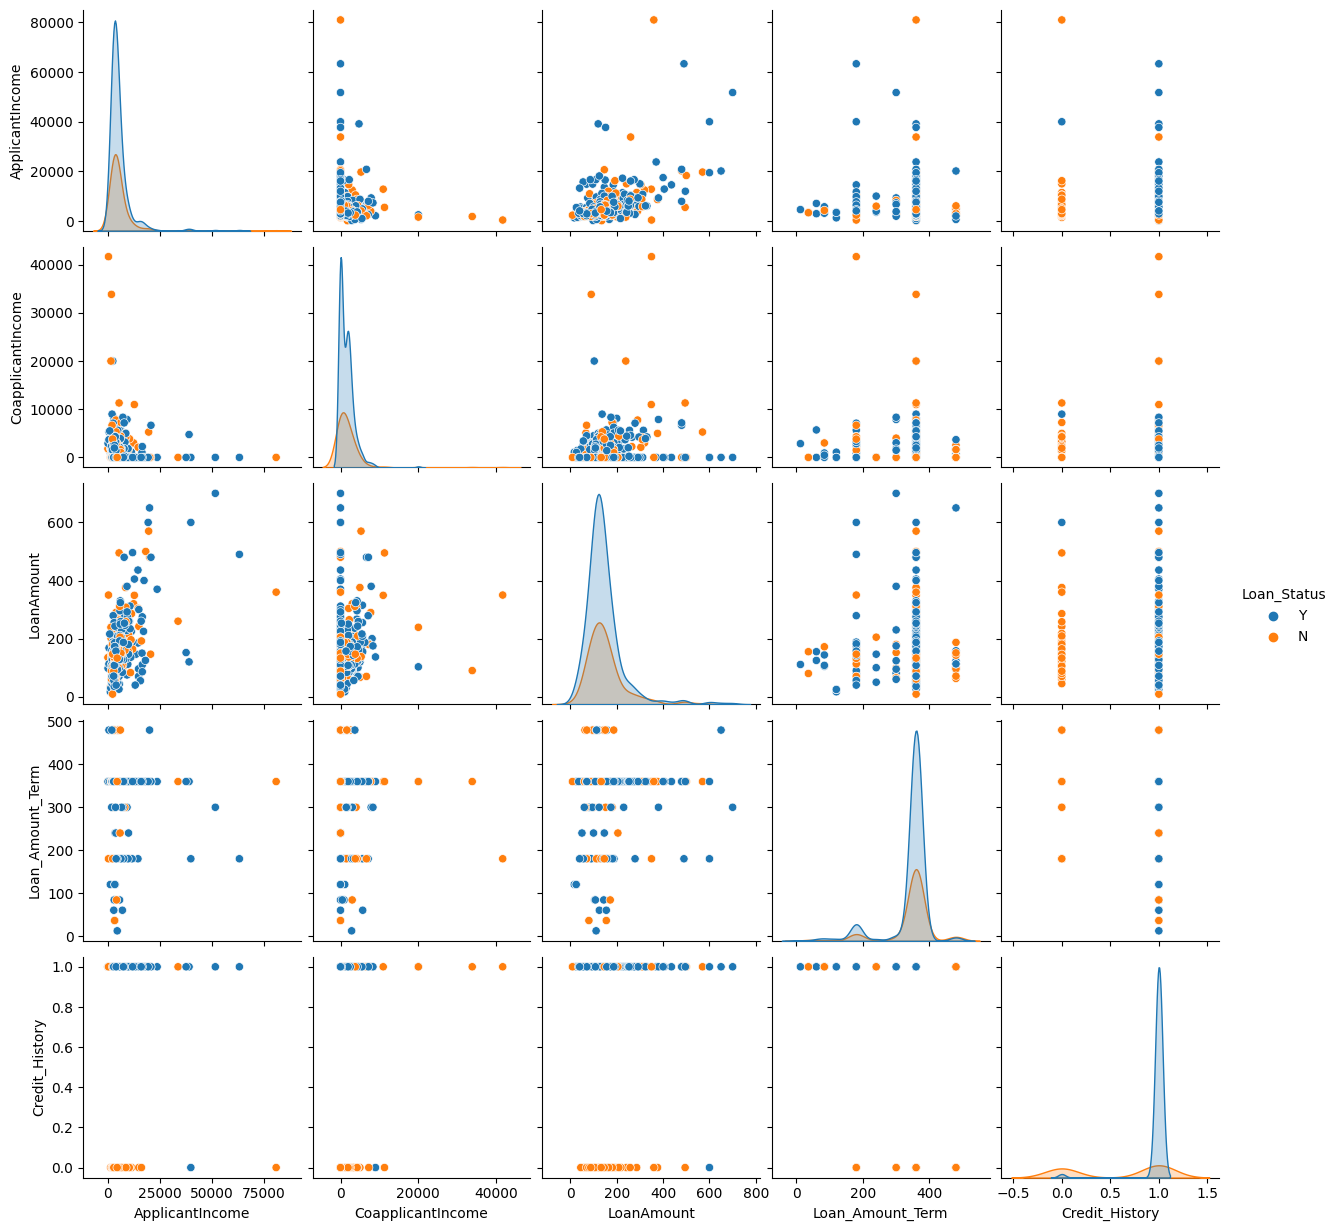

In [29]:
sns.pairplot(data=df,hue='Loan_Status')
plt.show()

In [30]:
#Education_loan=df[['Education', 'Loan_Status']].groupby(['Education', 'Loan_Status']).agg(Count = ('Loan_Status','count')).reset_index()
#Gender_loan=df[['Gender', 'Loan_Status']].groupby(['Gender', 'Loan_Status']).agg(Count = ('Loan_Status','count')).reset_index()
#Self_Employed=df[['Self_Employed', 'Loan_Status']].groupby(['Self_Employed', 'Loan_Status']).agg(Count = ('Loan_Status','count')).reset_index()
#Credit_History=df[['Credit_History', 'Loan_Status']].groupby(['Credit_History', 'Loan_Status']).agg(Count = ('Loan_Status','count')).reset_index()


#cols = ['Education', 'Gender', 'Self_Employed', 'Credit_History']

#for col in cols:
    #plt.figure(figsize=(6,4))
    #sns.countplot(x=col, hue='Loan_Status', data=df)
    #plt.title('Loan Status by {}'.format(col))
    #plt.xlabel(col)
    #plt.ylabel('Count')
    #plt.show()
#for col in ['Education','Gender','Self_Employed','Credit_History']:
  #print('\n\n')
  #df=col+'df'
  #df = pd.DataFrame(eval(df))
  #col_label = col.replace("_", " " )
  #fig1=plt.bar(data_frame=df, x=col, y='Count', color='Loan_Status', barmode='group', color_discrete_sequence=tricolor, text_auto=True, template='simple_white')

In [31]:
#df = df.groupby(['Property_Area', 'Loan_Status']).size().reset_index(name='Count') # group by Property_Area and Loan_Status and count the number of occurrences

# plot the bar chart
#fig, ax = plt.subplots()
#ax.bar(df[df['Loan_Status'] == 'Y']['Property_Area'], df[df['Loan_Status'] == 'Y']['Count'], 
       #color='green', label='Loan Approved')
#ax.bar(df[df['Loan_Status'] == 'N']['Property_Area'], df[df['Loan_Status'] == 'N']['Count'], 
       #color='red', label='Loan Rejected')
#ax.set_xlabel('Property Area')
#ax.set_ylabel('Count')
#ax.set_title('Impact of Property Area on Loan Approval')
#ax.legend()
#plt.show()


In [32]:
#property_df = df.groupby(['Property_Area', 'Loan_Status'])['Loan_Status'].count().unstack()
#plt.pie(property_df['Y'], labels=property_df.index, autopct='%1.1f%%')
#plt.title('Loan Approval by Property Area')
#plt.show()

In [33]:
#one_hot = pd.get_dummies(df['Gender'],prefix="Gender",drop_first=True)
#df = df.drop('Gender',axis = 1)
#df = df.join(one_hot)

#print(df.head())

In [34]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [35]:
#one_hot = pd.get_dummies(df['Property_Area'],prefix="Property_Area",drop_first=True)
#df = df.drop('Property_Area',axis = 1)
#df = df.join(one_hot)
#df.head()

In [36]:
# create dataframes for each variable of interest
#education_loan = df[['Education', 'Loan_Status']].groupby(['Education', 'Loan_Status']).agg(count=('Loan_Status','count')).reset_index()
#gender_loan = df[['Gender', 'Loan_Status']].groupby(['Gender', 'Loan_Status']).agg(count=('Loan_Status','count')).reset_index()
#self_employed_loan = df[['Self_Employed', 'Loan_Status']].groupby(['Self_Employed', 'Loan_Status']).agg(count=('Loan_Status','count')).reset_index()
#credit_history_loan = df[['Credit_History', 'Loan_Status']].groupby(['Credit_History', 'Loan_Status']).agg(count=('Loan_Status','count')).reset_index()

# plot the results
#for data, var in [(education_loan, 'Education'), (gender_loan, 'Gender'), (self_employed_loan, 'Self Employed'), (credit_history_loan, 'Credit History')]:
    #plt.figure(figsize=(6,4))
    #sns.barplot(x=var, y='count', hue='Loan_Status', data=df)
    #plt.title('Loan Status by {}'.format(var))
    #plt.xlabel(var)
    #plt.ylabel('Count')
    #plt.xticks(rotation=45)
    #plt.show()

In [37]:
def process(df):
  df['Dependents'] = df['Dependents'].replace('3+',3)
  df['Dependents'] = df['Dependents'].astype(int)           #Converting string to int
  
  df['Gender'] = df['Gender'].map({'Male':1,'Female':0})

  df['Married']=df['Married'].map({'Yes':1,'No':0})
  
  df['Education']=df['Education'].map({'Graduate':1,'Not Graduate':0})
    
  df['Self_Employed']=df['Self_Employed'].map({'Yes':1,'No':0})

  df['Loan_Status']=df['Loan_Status'].map({'Y':1,'N':0})

  #OneHot=OneHotEncoder(sparse=False)
  #transformed=OneHot.fit_transform(df[['Property_Area']])
    
  #df[OneHot.categories_[0]]=transformed
  #df=df.drop('Property_Area',axis=1)

  OneHot = pd.get_dummies(df['Property_Area'],prefix="Property_Area",drop_first=True)
  df = df.drop('Property_Area',axis = 1)
  df = df.join(OneHot)

  df.replace({'Y':1,'N':0},inplace=True)

  return df

In [38]:
prop_area_loan = df[['Property_Area', 'Loan_Status']].groupby(['Property_Area', 'Loan_Status']).agg(count=('Loan_Status', 'count')).reset_index()

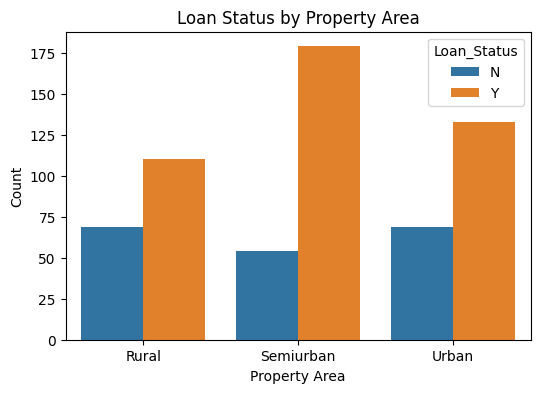

In [39]:
# group data by Property_Area and Loan_Status
property_loan = df[['Property_Area', 'Loan_Status']].groupby(['Property_Area', 'Loan_Status']).agg(count_loan_status=('Loan_Status','count')).reset_index()

# plot the results
plt.figure(figsize=(6,4))
sns.barplot(x='Property_Area', y='count_loan_status', hue='Loan_Status', data=property_loan)
plt.title('Loan Status by Property Area')
plt.xlabel('Property Area')
plt.ylabel('Count')
plt.show()


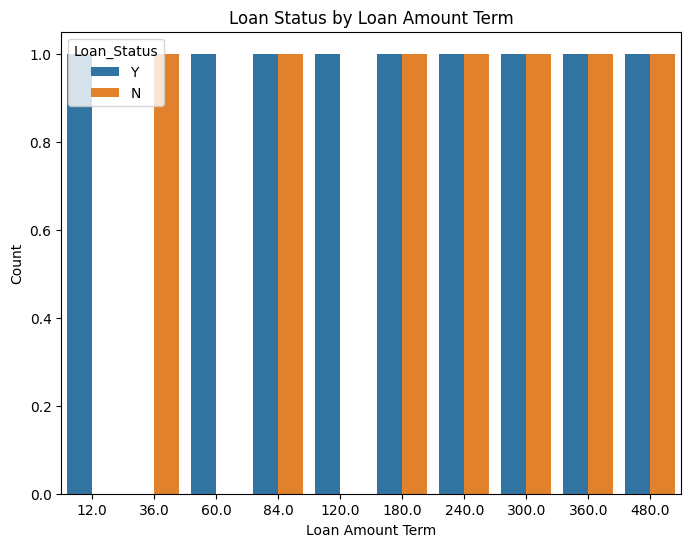

In [40]:
loan_term = df[['Loan_Amount_Term', 'Loan_Status']].groupby(['Loan_Amount_Term', 'Loan_Status']).size().reset_index(name='count')

plt.figure(figsize=(8,6))
sns.countplot(x='Loan_Amount_Term', hue='Loan_Status', data=loan_term)
plt.title('Loan Status by Loan Amount Term')
plt.xlabel('Loan Amount Term')
plt.ylabel('Count')
plt.show()

In [41]:
#if 'Gender' in df.columns:
    #print('Gender column is present')
#else:
    #print('Gender column is not present')

In [42]:
print(df.columns)

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')


In [43]:
df.corr()

<ipython-input-43-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
ApplicantIncome,1.000000,-0.116605,0.565620,-0.046531,-0.018615
CoapplicantIncome,-0.116605,1.000000,0.187828,-0.059383,0.011134
LoanAmount,0.565620,0.187828,1.000000,0.036475,-0.001431
Loan_Amount_Term,-0.046531,-0.059383,0.036475,1.000000,-0.004705
Credit_History,-0.018615,0.011134,-0.001431,-0.004705,1.000000


In [44]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Married'] = le.fit_transform(df['Married'])
df['Dependents'] = le.fit_transform(df['Dependents'])
df['Education'] = le.fit_transform(df['Education'])
df['Self_Employed'] = le.fit_transform(df['Self_Employed'])
df['Property_Area'] = le.fit_transform(df['Property_Area'])
df['Loan_Status'] = le.fit_transform(df['Loan_Status'])

X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

LR = LogisticRegression(solver='liblinear')

param_grid = {
    'penalty': ['l1', 'l2'],
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'max_iter': [1000]
}

grid_search = GridSearchCV(LR, param_grid=param_grid, cv=5, n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Best hyperparameters: ", grid_search.best_params_)

# Predict on test data using best estimator from GridSearchCV
y_pred = grid_search.predict(X_test)

# Evaluate the performance of the best estimator
score = grid_search.score(X_test, y_test)
print("Accuracy: {:.2f}%".format(score*100))


Best hyperparameters:  {'C': 10, 'max_iter': 1000, 'penalty': 'l2'}
Accuracy: 86.18%


In [45]:
X,y = df.drop(columns=['Loan_Status'],axis=1),df.iloc[:,-2]

In [46]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state= 42, stratify=y)

In [47]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(460, 11) (460,)
(154, 11) (154,)


In [48]:
# import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# convert categorical variables to numeric using one-hot encoding
df = pd.get_dummies(df, drop_first=True)

# separate features and target variable
X = df.drop(['Loan_Status'], axis=1)
y = df['Loan_Status']

# split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# define the models to be evaluated
models = [
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('Decision Tree', DecisionTreeClassifier(random_state=42)),
    ('Random Forest', RandomForestClassifier(random_state=42)),
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42))
]

# evaluate each model using cross-validation and grid search
results = []
names = []
for name, model in models:
    params = {}
    if name == 'Logistic Regression':
        params = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
    elif name == 'Decision Tree':
        params = {'max_depth': [3, 5, 7, 9]}
    elif name == 'Random Forest':
        params = {'n_estimators': [10, 50, 100], 'max_depth': [3, 5, 7]}
    elif name == 'Gradient Boosting':
        params = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 1], 'max_depth': [3, 5, 7]}
    grid = GridSearchCV(estimator=model, param_grid=params, cv=5, scoring='accuracy')
    cv_results = cross_val_score(grid, X_train, y_train, cv=5, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %.4f (%.4f)' % (name, cv_results.mean(), cv_results.std()))

# select the best model and fit it to the training data
best_model = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42)
best_model.fit(X_train, y_train)

# evaluate the best model on the testing data
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %.4f' % accuracy)
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))


Logistic Regression: 0.8126 (0.0205)
Decision Tree: 0.7902 (0.0098)
Random Forest: 0.8085 (0.0214)
Gradient Boosting: 0.7962 (0.0271)
Accuracy: 0.7236
Confusion Matrix:
 [[19 24]
 [10 70]]
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.44      0.53        43
           1       0.74      0.88      0.80        80

    accuracy                           0.72       123
   macro avg       0.70      0.66      0.67       123
weighted avg       0.71      0.72      0.71       123



In [49]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

classifiers = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    SVC()
]

# define the number of folds for cross-validation
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# perform cross-validation with each classifier and print the mean accuracy score
for classifier in classifiers:
    scores = cross_val_score(classifier, X, y, cv=cv, scoring='accuracy')
    print(f'{type(classifier).__name__}: {scores.mean()}')

LogisticRegression: 0.8029454884712781
DecisionTreeClassifier: 0.6987071837931494


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

RandomForestClassifier: 0.7850726376116219
SVC: 0.684073037451686


In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

params = {'penalty': ['l1', 'l2'], 
              'C': [0.001, 0.01, 0.1, 1, 10, 100], 
              'max_iter': [1000]}

LR = LogisticRegression(solver='liblinear')

Grid = GridSearchCV(LR, param_grid=params, cv=4)

Grid.fit(X_train, y_train)

print("Best parameters: ", Grid.best_params_)
print("Best score: ", Grid.best_score_)


Best parameters:  {'C': 0.001, 'max_iter': 1000, 'penalty': 'l2'}
Best score:  0.8167066506730641


In [51]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(random_state = 0)
LR.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [52]:
y_pred = LR.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [53]:
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score
print('The accuracy of Logistic Regression is: ', accuracy_score(y_test, y_pred))
print('The Confusion matrix is :', confusion_matrix(y_test,y_pred))

The accuracy of Logistic Regression is:  0.7886178861788617
The Confusion matrix is : [[18 25]
 [ 1 79]]


In [54]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score

In [55]:
RF = RandomForestClassifier(n_estimators=250, random_state=250)
RF.fit(X_train,y_train)

RandomForestClassifier(n_estimators=250, random_state=250)

In [56]:
y_pred = RF.predict(X_test)

In [57]:
#print('The accuracy of Random Forest is: ', accuracy_score(y_test, y_pred))
#print('The confusion matrix of Random Forest is: ', confusion_matrix(y_test, y_pred))
#print('The f1 score of Random Forest is: ', f1_score(y_test, y_pred))

In [58]:
from sklearn.metrics import precision_score, recall_score, f1_score

# calculate precision, recall, and f1-score using the micro average
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')


print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Precision: 0.7613997879109226
Recall: 0.7560975609756098
F1-score: 0.7326927814732693


In [59]:
feature_importance = RF.feature_importances_

In [60]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': [5, 10, 15],
              'min_samples_split': [2, 5, 10],
              'criterion': ['gini', 'entropy']}

DTC = DecisionTreeClassifier()

grid_search = GridSearchCV(DTC, param_grid=param_grid, cv=5)

grid_search.fit(X_train, y_train)

print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)


Best parameters:  {'criterion': 'gini', 'max_depth': 5, 'min_samples_split': 5}
Best score:  0.7800247371675944


In [61]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

dt.fit(X_train, y_train)

y_pred = dt.predict(X_test)
y_pred

array([1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1])

In [62]:
import sklearn
print(sklearn.__version__)

1.2.2


In [63]:
!pip install --upgrade scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [64]:
!pip install matplotlib-venn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [65]:
!apt-get -qq install -y libfluidsynth1

E: Package 'libfluidsynth1' has no installation candidate


In [66]:
!apt-get -qq install -y graphviz && pip install pydot
import pydot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [67]:
!apt-get -qq install -y libarchive-dev && pip install -U libarchive
import libarchive

Selecting previously unselected package libarchive-dev:amd64.
(Reading database ... 122518 files and directories currently installed.)
Preparing to unpack .../libarchive-dev_3.4.0-2ubuntu1.2_amd64.deb ...
Unpacking libarchive-dev:amd64 (3.4.0-2ubuntu1.2) ...
Setting up libarchive-dev:amd64 (3.4.0-2ubuntu1.2) ...
Processing triggers for man-db (2.9.1-1) ...
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 5.8 MB/s eta 0:00:00
  Created wheel for libarchive: filename=libarchive-0.4.7-py3-none-any.whl size=31644 sha256=2c10bbc06bb1b033fb8cdaec015f184d96162651d48ecef33e5d478d28a688d4
  Stored in directory: /root/.cache/pip/wheels/3a/94/d0/6cd83c8a80a4236fd4cb2a1fd846ecf72ab1e0ac238c5951c0
Successfully built libarchive


In [68]:
!pip install cartopy
import cartopy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 51.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 52.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.5/46.5 kB 4.2 MB/s eta 0:00:00
  Created wheel for cartopy: filename=Cartopy-0.21.1-cp310-cp310-linux_x86_64.whl size=11102742 sha256=aa6bc1042339e83a0f9ee093ce9bac88730f04b856473b8711d988109549ae67
  Stored in directory: /root/.cache/pip/wheels/30/b0/1a/1c1909e00c76653dc4e2ff48555257c0eb2d1698280c8d9955
Successfully built cartopy


In [69]:
from sklearn.metrics import accuracy_score, roc_auc_score, plot_roc_curve

y_pred = dt.predict(X_test) 

acc = accuracy_score(y_test, y_pred)
print("Test set accuracy: {:.2f}".format(acc))

acc = roc_auc_score(y_test, y_pred)
print("Test set auc: {:.2f}".format(acc))
plot_roc_curve(dt, X_test, y_test)

ImportError: ignored

In [70]:
from sklearn.model_selection import cross_val_score

for depth in [1,2,3,4,5,6,7,8,9,10,20]:
  dt = DecisionTreeClassifier(max_depth=depth) 
 
  dt.fit(X_train, y_train)

  dt = DecisionTreeClassifier(max_depth=depth)
  valAccuracy = cross_val_score(dt, X_train, y_train, cv=10)

  print("Depth is : ", depth, " Cross val score is : " ,np.mean(valAccuracy))

Depth is :  1  Cross val score is :  0.8147346938775512
Depth is :  2  Cross val score is :  0.8106938775510205
Depth is :  3  Cross val score is :  0.8086122448979591
Depth is :  4  Cross val score is :  0.8024897959183674
Depth is :  5  Cross val score is :  0.800408163265306
Depth is :  6  Cross val score is :  0.7963673469387755
Depth is :  7  Cross val score is :  0.7942857142857143
Depth is :  8  Cross val score is :  0.7922448979591835
Depth is :  9  Cross val score is :  0.7637959183673468
Depth is :  10  Cross val score is :  0.7473877551020409
Depth is :  20  Cross val score is :  0.7373469387755102


In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [50, 100, 200],
              'max_depth': [5, 10, 15],
              'min_samples_split': [2, 5, 10]}

RFC = RandomForestClassifier()

grid_search = GridSearchCV(RFC, param_grid=param_grid, cv=5)

grid_search.fit(X_train, y_train)

print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)


Best parameters:  {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 50}
Best score:  0.8145330859616575


In [72]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {'n_neighbors': [3, 5, 7, 9, 11],
              'weights': ['uniform', 'distance'],
              'algorithm': ['ball_tree', 'kd_tree', 'brute']}

KNC = KNeighborsClassifier()

grid_search = GridSearchCV(KNC, param_grid=param_grid, cv=5)

grid_search.fit(X_train, y_train)

print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)


Best parameters:  {'algorithm': 'ball_tree', 'n_neighbors': 9, 'weights': 'uniform'}
Best score:  0.7983508554937127


In [73]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Create a KNN classifier with the best parameters obtained from the grid search
knn = KNeighborsClassifier(n_neighbors=9, weights='uniform', algorithm='ball_tree')

# Train the classifier on the training set
knn.fit(X_train, y_train)

# Predict the target values for the test set
y_pred = knn.predict(X_test)

# Evaluate the performance of the classifier on the test set
accuracy = accuracy_score(y_test, y_pred)

print('Test Accuracy:', accuracy)


Test Accuracy: 0.7967479674796748


In [75]:
# predict the target variable using the fitted model and the test features
y_pred = knn.predict(X_test)

# calculate the accuracy of the model on the test dataset
test_accuracy = accuracy_score(y_test, y_pred)

print("Test Accuracy: {:.2f}".format(test_accuracy))

Test Accuracy: 0.80
